## 1. Import Library

In [1]:
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings 

## 2. Membaca Data

In [2]:
data = pd.read_csv('Tweets.csv')

## 3. Head dan Tail Data

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


## 4. Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## 5. Cek Missing Value

In [6]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
# menampilkan isi dari setiap variabel
print("Kategori untuk setiap variabel:")
for column in data.columns:
    print(f"{column}: {data[column].unique()}")
print()

Kategori untuk setiap variabel:
tweet_id: [570306133677760513 570301130888122368 570301083672813571 ...
 569587242672398336 569587188687634433 569587140490866689]
airline_sentiment: ['neutral' 'positive' 'negative']
airline_sentiment_confidence: [1.     0.3486 0.6837 ... 0.6384 0.7094 0.3487]
negativereason: [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']
negativereason_confidence: [   nan 0.     0.7033 ... 0.6234 0.644  0.7255]
airline: ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
airline_sentiment_gold: [nan 'negative' 'neutral' 'positive']
name: ['cairdin' 'jnardino' 'yvonnalynn' ... 'KristenReenders' 'itsropes'
 'sanyabun']
negativereason_gold: [nan 'Late Flight\nFlight Attendant Complaints'
 'Late Flight\nLost Luggage' 'Late Flight' 'Customer Service Issue'
 "Can't Tell" 'Cancelled Flight\nCustomer Service Issue

## Data Visualisasi

Jumlah total sentimen tweet :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


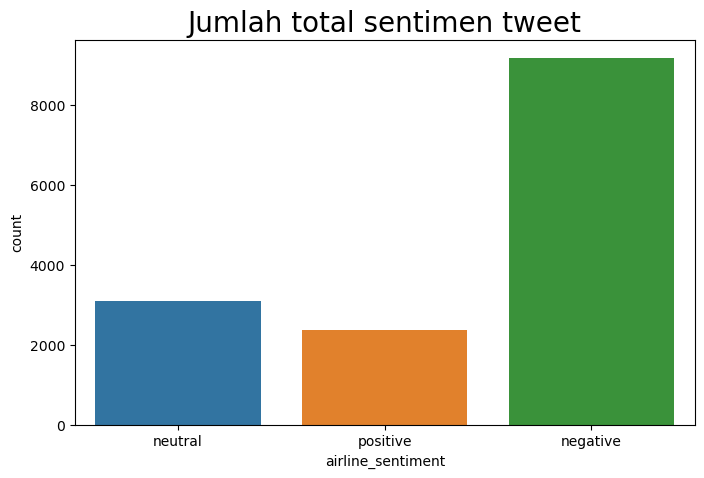

In [8]:
cprint("Jumlah total sentimen tweet :",'green')
print(data.airline_sentiment.value_counts())
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'airline_sentiment', data = data)
ax.set_title(label = 'Jumlah total sentimen tweet', fontsize = 20)
plt.show()

Jumlah total tweet untuk setiap maskapai penerbangan :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


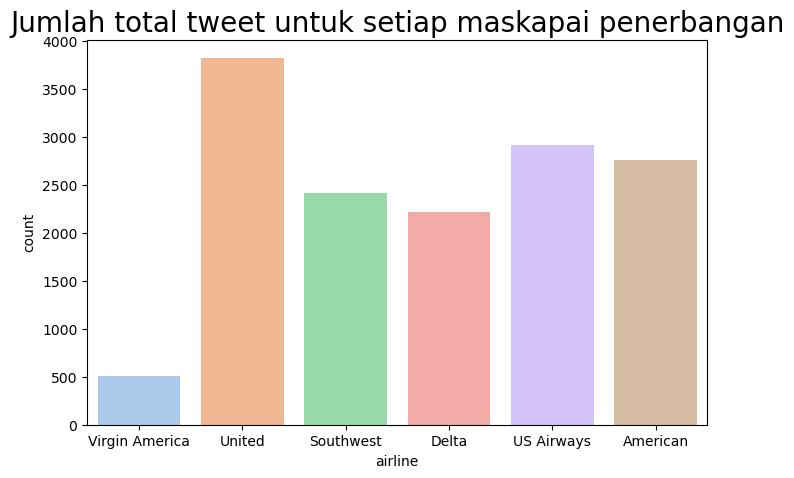

Jumlah total tweet untuk setiap maskapai penerbangan :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [9]:
cprint("Jumlah total tweet untuk setiap maskapai penerbangan :",'green')
print(data.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'airline', data = data, palette = 'pastel')
ax.set_title(label = 'Jumlah total tweet untuk setiap maskapai penerbangan', fontsize = 20)
plt.show()

cprint("Jumlah total tweet untuk setiap maskapai penerbangan :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),data.loc[data.airline == i].airline_sentiment.value_counts())

## Alasan Tweet Negatif di Setiap Perusahaan Maskapai Penerbangan

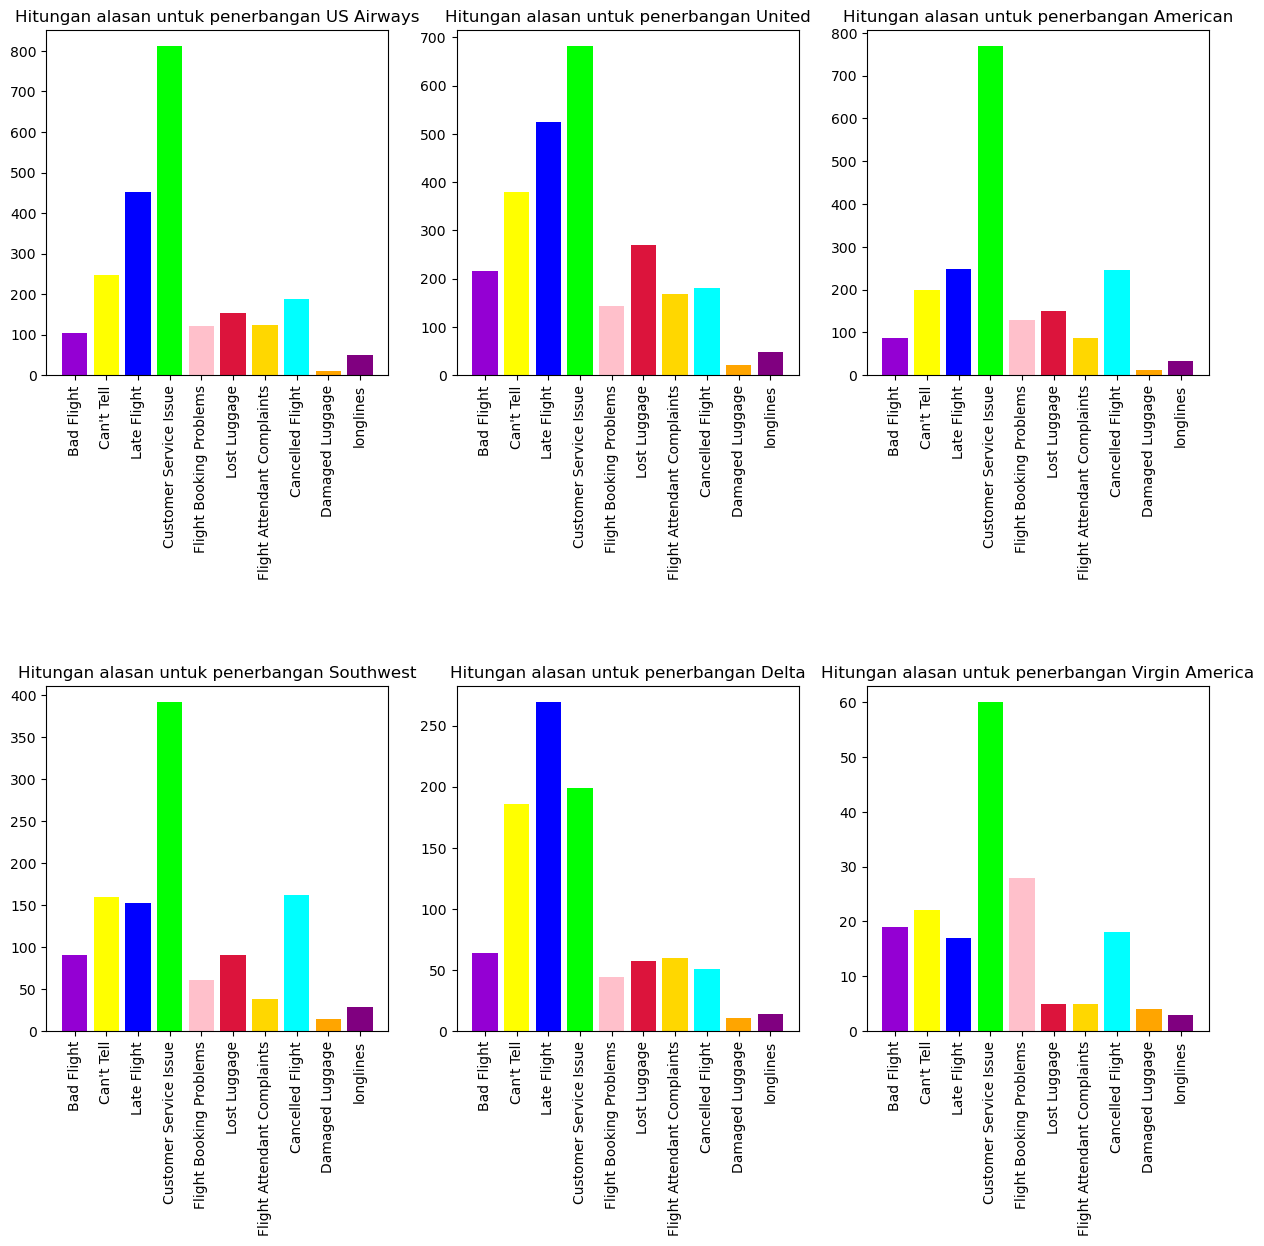

In [10]:
NR_Count=data['negativereason'].value_counts()
def NCount(Airline):
    airlineName =data[data['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= data['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Hitungan alasan untuk penerbangan '+ airline)
    
plt.figure(2,figsize=(15, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)

## Pisahkan Teks Sentimen

In [11]:
positive=data[data['airline_sentiment']=='positive'].text
neutral=data[data['airline_sentiment']=='neutral'].text
negative=data[data['airline_sentiment']=='negative'].text

## World Cloud untuk Postive Sentiments

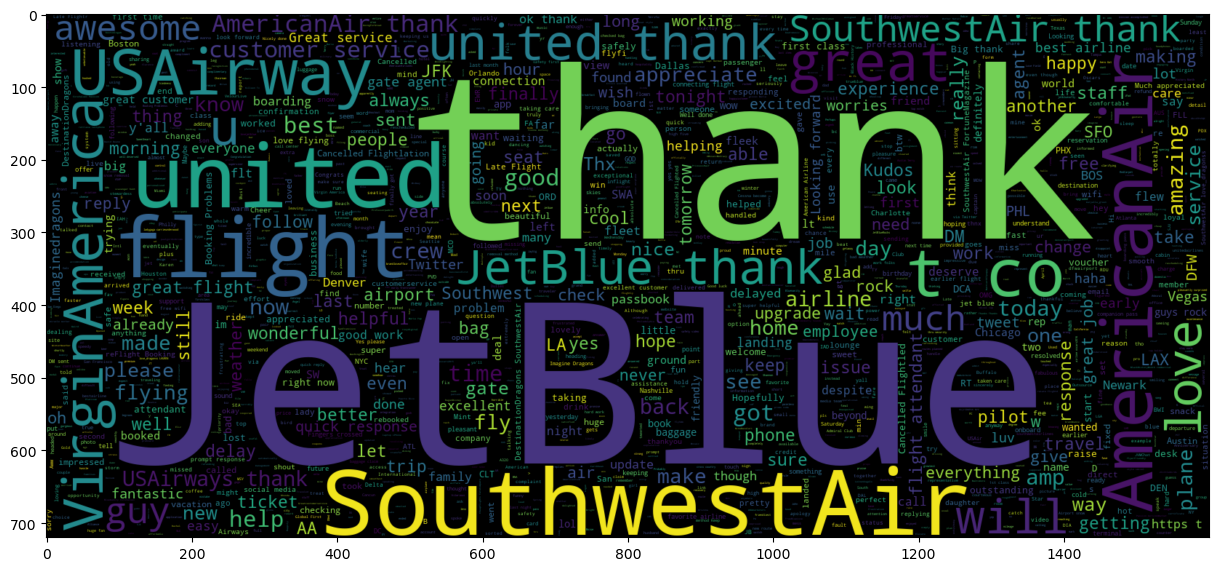

In [12]:
plt.figure(figsize=(15, 13))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

## World could untuk Neutral sentiments

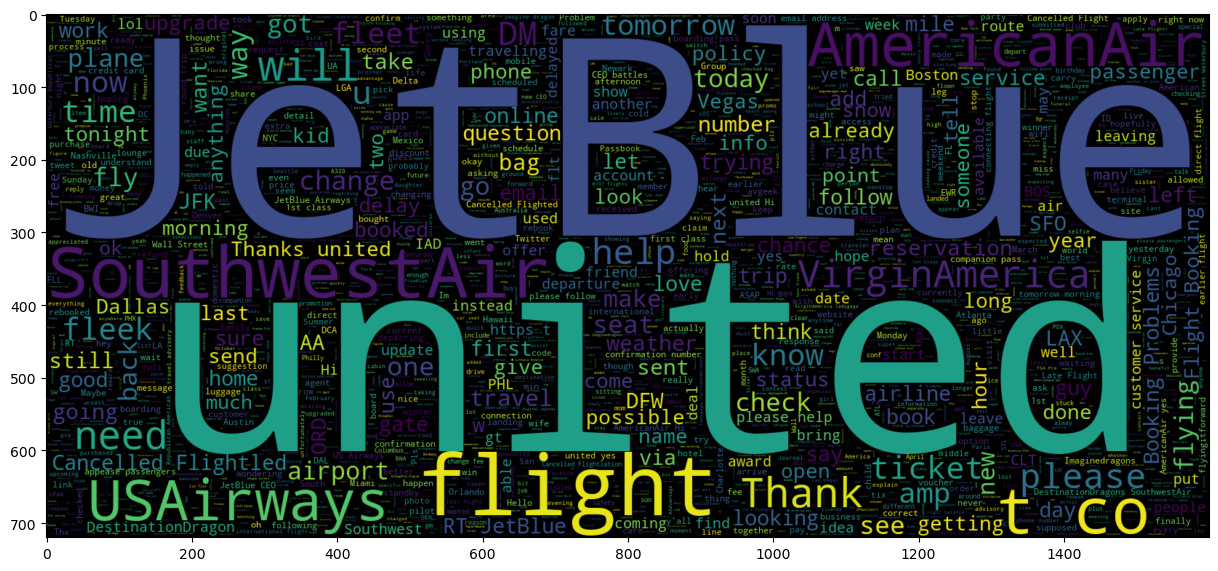

In [13]:
plt.figure(figsize=(15, 13))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')
ax.grid(False)

## World could untuk Negative sentiments

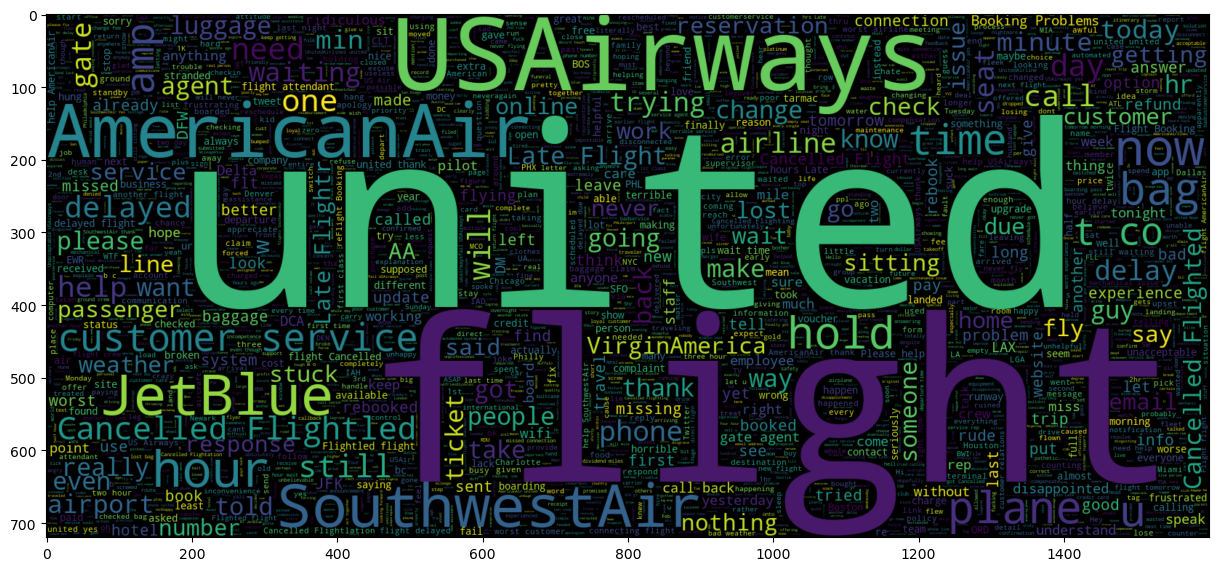

In [14]:
plt.figure(figsize = (15, 13)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

## TEXT PREPROCESSING AND CLEANING

In [15]:
# convert sentiments ke bentuk numerik 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [16]:
# Terapkan fungsi convert_Sentiment 
data.airline_sentiment = data.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [17]:
data.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [18]:
# Memperluas tampilan kolom teks 
pd.set_option('display.max_colwidth', -1)

# Memakai kolom 'airline','airline_sentiment','text column'
data= data [['airline','airline_sentiment','text']]
data.head()

C:\Users\ADVENTA\AppData\Local\Temp\ipykernel_17156\1690536451.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,airline,airline_sentiment,text
0,Virgin America,1,@VirginAmerica What @dhepburn said.
1,Virgin America,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,Virgin America,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,Virgin America,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,Virgin America,0,@VirginAmerica and it's a really big bad thing about it


In [19]:
# Memeriksa jumlah variabel dependen
data['airline_sentiment'].value_counts()

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

In [20]:
# ------ Case Folding --------
# Gunakan fungsi Series.str.lower() pada Pandas
data['text'] = data['text'].str.lower()

print('Case Folding Result : ')
# print(data['text'].head(5))
data.head()

Case Folding Result : 


,airline,airline_sentiment,text
0,Virgin America,1,@virginamerica what @dhepburn said.
1,Virgin America,2,@virginamerica plus you've added commercials to the experience... tacky.
2,Virgin America,1,@virginamerica i didn't today... must mean i need to take another trip!
3,Virgin America,0,"@virginamerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,Virgin America,0,@virginamerica and it's a really big bad thing about it


In [21]:
# Tokenizing

import string 
import re #regex library
import nltk
nltk.download('punkt')

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data['text'] = data['text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data['text'] = data['text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['text'] = data['text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['text'] = data['text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data['text'] = data['text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['text'] = data['text'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['text_tokens'] = data['text'].apply(word_tokenize_wrapper)

print('Tokenizing : ') 
# print(data['text_tokens'])
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADVENTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenizing : 


,airline,airline_sentiment,text,text_tokens
0,Virgin America,1,what said,"[what, said]"
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]"


In [22]:
# NLTK calc frequency distribution

def freqDist_wrapper(text):
    return FreqDist(text)

data['text_tokens_fdist'] = data['text_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens :') 
print(data['text_tokens_fdist'].head().apply(lambda x : x.most_common()))
data.head()

Frequency Tokens :
0    [(what, 1), (said, 1)]                                                                                                                                                                                    
1    [(plus, 1), (youve, 1), (added, 1), (commercials, 1), (to, 1), (the, 1), (experience, 1), (tacky, 1)]                                                                                                     
2    [(didnt, 1), (today, 1), (must, 1), (mean, 1), (need, 1), (to, 1), (take, 1), (another, 1), (trip, 1)]                                                                                                    
3    [(its, 1), (really, 1), (aggressive, 1), (to, 1), (blast, 1), (obnoxious, 1), (entertainment, 1), (in, 1), (your, 1), (guests, 1), (faces, 1), (amp, 1), (they, 1), (have, 1), (little, 1), (recourse, 1)]
4    [(and, 1), (its, 1), (really, 1), (big, 1), (bad, 1), (thing, 1), (about, 1), (it, 1)]                                                          

,airline,airline_sentiment,text,text_tokens,text_tokens_fdist
0,Virgin America,1,what said,"[what, said]","{'what': 1, 'said': 1}"
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]","{'plus': 1, 'youve': 1, 'added': 1, 'commercials': 1, 'to': 1, 'the': 1, 'experience': 1, 'tacky': 1}"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]","{'didnt': 1, 'today': 1, 'must': 1, 'mean': 1, 'need': 1, 'to': 1, 'take': 1, 'another': 1, 'trip': 1}"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","{'its': 1, 'really': 1, 'aggressive': 1, 'to': 1, 'blast': 1, 'obnoxious': 1, 'entertainment': 1, 'in': 1, 'your': 1, 'guests': 1, 'faces': 1, 'amp': 1, 'they': 1, 'have': 1, 'little': 1, 'recourse': 1}"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]","{'and': 1, 'its': 1, 'really': 1, 'big': 1, 'bad': 1, 'thing': 1, 'about': 1, 'it': 1}"


In [23]:
# Filtering (Stopword Removal)

from nltk.corpus import stopwords
nltk.download('stopwords')

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('english')

txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


# remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['text_tokens_WSW'] = data['text_tokens'].apply(stopwords_removal) 

print('Stopword Removal :') 
print(data['text_tokens_WSW'].head())
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADVENTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stopword Removal :
0    [said]                                                                                     
1    [plus, youve, added, commercials, experience, tacky]                                       
2    [didnt, today, must, mean, need, take, another, trip]                                      
3    [really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]
4    [really, big, bad, thing]                                                                  
Name: text_tokens_WSW, dtype: object


,airline,airline_sentiment,text,text_tokens,text_tokens_fdist,text_tokens_WSW
0,Virgin America,1,what said,"[what, said]","{'what': 1, 'said': 1}",[said]
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]","{'plus': 1, 'youve': 1, 'added': 1, 'commercials': 1, 'to': 1, 'the': 1, 'experience': 1, 'tacky': 1}","[plus, youve, added, commercials, experience, tacky]"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]","{'didnt': 1, 'today': 1, 'must': 1, 'mean': 1, 'need': 1, 'to': 1, 'take': 1, 'another': 1, 'trip': 1}","[didnt, today, must, mean, need, take, another, trip]"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","{'its': 1, 'really': 1, 'aggressive': 1, 'to': 1, 'blast': 1, 'obnoxious': 1, 'entertainment': 1, 'in': 1, 'your': 1, 'guests': 1, 'faces': 1, 'amp': 1, 'they': 1, 'have': 1, 'little': 1, 'recourse': 1}","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]","{'and': 1, 'its': 1, 'really': 1, 'big': 1, 'bad': 1, 'thing': 1, 'about': 1, 'it': 1}","[really, big, bad, thing]"


In [24]:
# Normalization

normalizad_word_dict = {}

for index, row in data.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['text_normalized'] = data['text_tokens_WSW'].apply(normalized_term)

print('Normalization :') 
data['text_normalized'].head()
data.head()

Normalization :


,airline,airline_sentiment,text,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized
0,Virgin America,1,what said,"[what, said]","{'what': 1, 'said': 1}",[said],[said]
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]","{'plus': 1, 'youve': 1, 'added': 1, 'commercials': 1, 'to': 1, 'the': 1, 'experience': 1, 'tacky': 1}","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercials, experience, tacky]"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]","{'didnt': 1, 'today': 1, 'must': 1, 'mean': 1, 'need': 1, 'to': 1, 'take': 1, 'another': 1, 'trip': 1}","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","{'its': 1, 'really': 1, 'aggressive': 1, 'to': 1, 'blast': 1, 'obnoxious': 1, 'entertainment': 1, 'in': 1, 'your': 1, 'guests': 1, 'faces': 1, 'amp': 1, 'they': 1, 'have': 1, 'little': 1, 'recourse': 1}","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]","{'and': 1, 'its': 1, 'really': 1, 'big': 1, 'bad': 1, 'thing': 1, 'about': 1, 'it': 1}","[really, big, bad, thing]","[really, big, bad, thing]"


In [25]:
!pip install swifter
!pip install nltk

import swifter
from nltk.stem import WordNetLemmatizer
import nltk

# Mengunduh resource NLTK yang diperlukan
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# Membuat objek lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Definisikan fungsi untuk lemmatization
def lemmatization(term):
    return wordnet_lemmatizer.lemmatize(term)

term_dict = {}

for document in data['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = lemmatization(term)
    print(term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Terapkan lemmatization ke DataFrame
def get_lemmatized_term(document):
    return [term_dict[term] for term in document]

data['text_lemmatized'] = data['text_normalized'].swifter.apply(get_lemmatized_term)
print(data['text_lemmatized'])
data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADVENTA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADVENTA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADVENTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


11096
------------------------
said : said
plus : plus
youve : youve
added : added
commercials : commercial
experience : experience
tacky : tacky
didnt : didnt
today : today
must : must
mean : mean
need : need
take : take
another : another
trip : trip
really : really
aggressive : aggressive
blast : blast
obnoxious : obnoxious
entertainment : entertainment
guests : guest
faces : face
amp : amp
little : little
recourse : recourse
big : big
bad : bad
thing : thing
seriously : seriously
would : would
pay : pay
flight : flight
seats : seat
playing : playing
flying : flying
va : va
yes : yes
nearly : nearly
every : every
time : time
fly : fly
vx : vx
ear : ear
worm : worm
wont : wont
go : go
away : away
missed : missed
prime : prime
opportunity : opportunity
men : men
without : without
hats : hat
parody : parody
well : well
didntbut : didntbut
amazing : amazing
arrived : arrived
hour : hour
early : early
youre : youre
good : good
know : know
suicide : suicide
second : second
leading : leadin

Pandas Apply:   0%|          | 0/14640 [00:00<?, ?it/s]

0        [said]                                                                                                             
1        [plus, youve, added, commercial, experience, tacky]                                                                
2        [didnt, today, must, mean, need, take, another, trip]                                                              
3        [really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]                          
4        [really, big, bad, thing]                                                                                          
                   ...                                                                                                      
14635    [thank, got, different, flight, chicago]                                                                           
14636    [leaving, minute, late, flight, warning, communication, minute, late, flight, thats, called, shitty, customer, svc]


,airline,airline_sentiment,text,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_lemmatized
0,Virgin America,1,what said,"[what, said]","{'what': 1, 'said': 1}",[said],[said],[said]
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]","{'plus': 1, 'youve': 1, 'added': 1, 'commercials': 1, 'to': 1, 'the': 1, 'experience': 1, 'tacky': 1}","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercial, experience, tacky]"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]","{'didnt': 1, 'today': 1, 'must': 1, 'mean': 1, 'need': 1, 'to': 1, 'take': 1, 'another': 1, 'trip': 1}","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","{'its': 1, 'really': 1, 'aggressive': 1, 'to': 1, 'blast': 1, 'obnoxious': 1, 'entertainment': 1, 'in': 1, 'your': 1, 'guests': 1, 'faces': 1, 'amp': 1, 'they': 1, 'have': 1, 'little': 1, 'recourse': 1}","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]","{'and': 1, 'its': 1, 'really': 1, 'big': 1, 'bad': 1, 'thing': 1, 'about': 1, 'it': 1}","[really, big, bad, thing]","[really, big, bad, thing]","[really, big, bad, thing]"


In [26]:
# importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

# defining the object for stemming
porter_stemmer = PorterStemmer()

# defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
data['text_stemmed']=data['text_lemmatized'].apply(lambda x: stemming(x))
print('Stemming :') 
data.head()

Stemming :


,airline,airline_sentiment,text,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_lemmatized,text_stemmed
0,Virgin America,1,what said,"[what, said]","{'what': 1, 'said': 1}",[said],[said],[said],[said]
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]","{'plus': 1, 'youve': 1, 'added': 1, 'commercials': 1, 'to': 1, 'the': 1, 'experience': 1, 'tacky': 1}","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercial, experience, tacky]","[plu, youv, ad, commerci, experi, tacki]"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]","{'didnt': 1, 'today': 1, 'must': 1, 'mean': 1, 'need': 1, 'to': 1, 'take': 1, 'another': 1, 'trip': 1}","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, anoth, trip]"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","{'its': 1, 'really': 1, 'aggressive': 1, 'to': 1, 'blast': 1, 'obnoxious': 1, 'entertainment': 1, 'in': 1, 'your': 1, 'guests': 1, 'faces': 1, 'amp': 1, 'they': 1, 'have': 1, 'little': 1, 'recourse': 1}","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]","[realli, aggress, blast, obnoxi, entertain, guest, face, amp, littl, recours]"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]","{'and': 1, 'its': 1, 'really': 1, 'big': 1, 'bad': 1, 'thing': 1, 'about': 1, 'it': 1}","[really, big, bad, thing]","[really, big, bad, thing]","[really, big, bad, thing]","[realli, big, bad, thing]"


In [27]:
data.head(10)

,airline,airline_sentiment,text,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_lemmatized,text_stemmed
0,Virgin America,1,what said,"[what, said]","{'what': 1, 'said': 1}",[said],[said],[said],[said]
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]","{'plus': 1, 'youve': 1, 'added': 1, 'commercials': 1, 'to': 1, 'the': 1, 'experience': 1, 'tacky': 1}","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercial, experience, tacky]","[plu, youv, ad, commerci, experi, tacki]"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]","{'didnt': 1, 'today': 1, 'must': 1, 'mean': 1, 'need': 1, 'to': 1, 'take': 1, 'another': 1, 'trip': 1}","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, anoth, trip]"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","{'its': 1, 'really': 1, 'aggressive': 1, 'to': 1, 'blast': 1, 'obnoxious': 1, 'entertainment': 1, 'in': 1, 'your': 1, 'guests': 1, 'faces': 1, 'amp': 1, 'they': 1, 'have': 1, 'little': 1, 'recourse': 1}","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]","[realli, aggress, blast, obnoxi, entertain, guest, face, amp, littl, recours]"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]","{'and': 1, 'its': 1, 'really': 1, 'big': 1, 'bad': 1, 'thing': 1, 'about': 1, 'it': 1}","[really, big, bad, thing]","[really, big, bad, thing]","[really, big, bad, thing]","[realli, big, bad, thing]"
5,Virgin America,0,seriously would pay flight for seats that didnt have this playing its really the only bad thing about flying va,"[seriously, would, pay, flight, for, seats, that, didnt, have, this, playing, its, really, the, only, bad, thing, about, flying, va]","{'seriously': 1, 'would': 1, 'pay': 1, 'flight': 1, 'for': 1, 'seats': 1, 'that': 1, 'didnt': 1, 'have': 1, 'this': 1, 'playing': 1, 'its': 1, 'really': 1, 'the': 1, 'only': 1, 'bad': 1, 'thing': 1, 'about': 1, 'flying': 1, 'va': 1}","[seriously, would, pay, flight, seats, didnt, playing, really, bad, thing, flying, va]","[seriously, would, pay, flight, seats, didnt, playing, really, bad, thing, flying, va]","[seriously, would, pay, flight, seat, didnt, playing, really, bad, thing, flying, va]","[serious, would, pay, flight, seat, didnt, play, realli, bad, thing, fli, va]"
6,Virgin America,2,yes nearly every time fly vx this ear worm wont go away,"[yes, nearly, every, time, fly, vx, this, ear, worm, wont, go, away]","{'yes': 1, 'nearly': 1, 'every': 1, 'time': 1, 'fly': 1, 'vx': 1, 'this': 1, 'ear': 1, 'worm': 1, 'wont': 1, 'go': 1, 'away': 1}","[yes, nearly, every, time, fly, vx, ear, worm, wont, go, away]","[yes, nearly, every, time, fly, vx, ear, worm, wont, go, away]","[yes, nearly, every, time, fly, vx, ear, worm, wont, go, away]","[ye, nearli, everi, time, fli, vx, ear, worm, wont, go, away]"
7,Virgin America,1,really missed prime opportunity for men without hats parody there,"[really, missed, prime, opportunity, for, men, without, hats, parody, there]","{'really': 1, 'missed': 1, 'prime': 1, 'opportunity': 1, 'for': 1, 'men': 1, 'without': 1, 'hats': 1, 'parody': 1, 'there': 1}","[really, missed, prime, opportunity, men, without, hats, parody]","[really, miss

In [28]:
data['final_text'] = data ['text_stemmed']
data.head(10)

,airline,airline_sentiment,text,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_lemmatized,text_stemmed,final_text
0,Virgin America,1,what said,"[what, said]","{'what': 1, 'said': 1}",[said],[said],[said],[said],[said]
1,Virgin America,2,plus youve added commercials to the experience tacky,"[plus, youve, added, commercials, to, the, experience, tacky]","{'plus': 1, 'youve': 1, 'added': 1, 'commercials': 1, 'to': 1, 'the': 1, 'experience': 1, 'tacky': 1}","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercials, experience, tacky]","[plus, youve, added, commercial, experience, tacky]","[plu, youv, ad, commerci, experi, tacki]","[plu, youv, ad, commerci, experi, tacki]"
2,Virgin America,1,didnt today must mean need to take another trip,"[didnt, today, must, mean, need, to, take, another, trip]","{'didnt': 1, 'today': 1, 'must': 1, 'mean': 1, 'need': 1, 'to': 1, 'take': 1, 'another': 1, 'trip': 1}","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, another, trip]","[didnt, today, must, mean, need, take, anoth, trip]","[didnt, today, must, mean, need, take, anoth, trip]"
3,Virgin America,0,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,"[its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, amp, they, have, little, recourse]","{'its': 1, 'really': 1, 'aggressive': 1, 'to': 1, 'blast': 1, 'obnoxious': 1, 'entertainment': 1, 'in': 1, 'your': 1, 'guests': 1, 'faces': 1, 'amp': 1, 'they': 1, 'have': 1, 'little': 1, 'recourse': 1}","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guests, faces, amp, little, recourse]","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]","[realli, aggress, blast, obnoxi, entertain, guest, face, amp, littl, recours]","[realli, aggress, blast, obnoxi, entertain, guest, face, amp, littl, recours]"
4,Virgin America,0,and its really big bad thing about it,"[and, its, really, big, bad, thing, about, it]","{'and': 1, 'its': 1, 'really': 1, 'big': 1, 'bad': 1, 'thing': 1, 'about': 1, 'it': 1}","[really, big, bad, thing]","[really, big, bad, thing]","[really, big, bad, thing]","[realli, big, bad, thing]","[realli, big, bad, thing]"
5,Virgin America,0,seriously would pay flight for seats that didnt have this playing its really the only bad thing about flying va,"[seriously, would, pay, flight, for, seats, that, didnt, have, this, playing, its, really, the, only, bad, thing, about, flying, va]","{'seriously': 1, 'would': 1, 'pay': 1, 'flight': 1, 'for': 1, 'seats': 1, 'that': 1, 'didnt': 1, 'have': 1, 'this': 1, 'playing': 1, 'its': 1, 'really': 1, 'the': 1, 'only': 1, 'bad': 1, 'thing': 1, 'about': 1, 'flying': 1, 'va': 1}","[seriously, would, pay, flight, seats, didnt, playing, really, bad, thing, flying, va]","[seriously, would, pay, flight, seats, didnt, playing, really, bad, thing, flying, va]","[seriously, would, pay, flight, seat, didnt, playing, really, bad, thing, flying, va]","[serious, would, pay, flight, seat, didnt, play, realli, bad, thing, fli, va]","[serious, would, pay, flight, seat, didnt, play, realli, bad, thing, fli, va]"
6,Virgin America,2,yes nearly every time fly vx this ear worm wont go away,"[yes, nearly, every, time, fly, vx, this, ear, worm, wont, go, away]","{'yes': 1, 'nearly': 1, 'every': 1, 'time': 1, 'fly': 1, 'vx': 1, 'this': 1, 'ear': 1, 'worm': 1, 'wont': 1, 'go': 1, 'away': 1}","[yes, nearly, every, time, fly, vx, ear, worm, wont, go, away]","[yes, nearly, every, time, fly, vx, ear, worm, wont, go, away]","[yes, nearly, every, time, fly, vx, ear, worm, wont, go, away]","[ye, nearli, everi, time, fli, vx, ear, worm, wont, go, away]","[ye, nearli, everi, time, fli, vx, ear, worm, wont, go, away]"
7,Virgi

In [29]:
# save data baru ke excel
data.to_csv("airline_tweets.csv")